# Vectors Practice

In this chapter we will work with vectors and code Gramm-Schmidt Orthonormalization Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lovely_numpy as ln
import json_tricks

In [3]:
inputs = json_tricks.load('inputs/inputs.json')
answers = {}

In your input you have arrys of shape $N \times 2$, which means that you have 2 vectors both having N coordinates

In [4]:
for one_input in inputs:
    print(ln.lovely(one_input['X']))

array[2, 2] i64 n=4 x∈[-10, 5] μ=-2.500 σ=6.185 [[2, 5], [-10, -7]]
array[5, 2] i64 n=10 x∈[-9, 9] μ=-1.500 σ=5.784 [[-7, -3], [-1, 9], [8, -6], [-4, 2], [-9, -4]]
array[9, 2] i64 n=18 x∈[-10, 9] μ=2.833 σ=6.039
array[5, 2] i64 n=10 x∈[-10, 8] μ=-2.700 σ=5.900 [[4, -3], [-10, -9], [-1, -10], [0, -7], [1, 8]]
array[9, 2] i64 n=18 x∈[-10, 7] μ=-4.056 σ=4.696
array[9, 2] i64 n=18 x∈[-10, 8] μ=-0.944 σ=5.038
array[9, 2] i64 n=18 x∈[-10, 8] μ=-1.778 σ=6.554
array[4, 2] i64 n=8 x∈[-10, 8] μ=0.500 σ=5.220 [[3, 6], [-3, -1], [-10, 0], [8, 1]]
array[4, 2] i64 n=8 x∈[-8, 8] μ=-2.250 σ=6.741 [[-8, -8], [-7, -7], [8, 4], [-7, 7]]
array[4, 2] i64 n=8 x∈[-9, 4] μ=-1.500 σ=3.905 [[4, -1], [-9, -6], [0, 1], [-2, 1]]
array[4, 2] i64 n=8 x∈[-10, 9] μ=0.500 σ=7.314 [[9, 6], [-10, -10], [-4, 9], [4, 0]]
array[5, 2] i64 n=10 x∈[-8, 6] μ=-1.600 σ=4.673 [[-2, 3], [-8, -7], [-8, 1], [3, 6], [-2, -2]]
array[5, 2] i64 n=10 x∈[-10, 4] μ=-3.000 σ=4.919 [[-2, -8], [-7, 2], [4, -10], [-6, -7], [3, 1]]
array[6, 2] i

# Task 1. Vector lenghts

- Write a function that calculates vector lengths, answer should return array of shape $2$
- Apply this function to all the inputs

In [5]:
def get_length(X):
    res = None
    res = (sum([x**2 for x in X]))**0.5
    return res

In [6]:
answers['lengths'] = [
    get_length(**inp) for inp in inputs
]

In [7]:
for x in inputs:
    for key, value in x.items():
        print(f"{key}: {value}")

X: [[  2   5]
 [-10  -7]]
X: [[-7 -3]
 [-1  9]
 [ 8 -6]
 [-4  2]
 [-9 -4]]
X: [[  4   7]
 [ -5   3]
 [ -2  -1]
 [  9   6]
 [  9  -5]
 [  5   5]
 [-10   8]
 [ -7   7]
 [  9   9]]
X: [[  4  -3]
 [-10  -9]
 [ -1 -10]
 [  0  -7]
 [  1   8]]
X: [[ -8 -10]
 [-10  -6]
 [ -5  -4]
 [ -2   7]
 [  5  -6]
 [ -1   0]
 [ -9  -9]
 [ -3  -1]
 [ -7  -4]]
X: [[  1   4]
 [  8 -10]
 [  4  -7]
 [  2   0]
 [  1  -6]
 [ -4  -6]
 [  5  -7]
 [  2  -6]
 [ -2   4]]
X: [[ -7   5]
 [  3   6]
 [  7  -5]
 [ -1  -7]
 [-10  -5]
 [-10   7]
 [  8  -6]
 [ -8   6]
 [ -7  -8]]
X: [[  3   6]
 [ -3  -1]
 [-10   0]
 [  8   1]]
X: [[-8 -8]
 [-7 -7]
 [ 8  4]
 [-7  7]]
X: [[ 4 -1]
 [-9 -6]
 [ 0  1]
 [-2  1]]
X: [[  9   6]
 [-10 -10]
 [ -4   9]
 [  4   0]]
X: [[-2  3]
 [-8 -7]
 [-8  1]
 [ 3  6]
 [-2 -2]]
X: [[ -2  -8]
 [ -7   2]
 [  4 -10]
 [ -6  -7]
 [  3   1]]
X: [[  3   3]
 [  1   6]
 [  4   6]
 [  9  -9]
 [ -2 -10]
 [ -6  -4]]
X: [[ 3 -3]
 [ 5 -1]
 [ 8 -2]
 [ 5  1]
 [-4  5]
 [-9  2]
 [-7  8]]
X: [[ -7   0]
 [  2  -4]
 [ -7  -

In [8]:
answers['lengths']

[array([10.19803903,  8.60232527]),
 array([14.52583905, 12.08304597]),
 array([21.49418526, 18.41195264]),
 array([10.86278049, 17.40689519]),
 array([18.92088793, 18.30300522]),
 array([11.61895004, 18.38477631]),
 array([22.02271555, 18.57417562]),
 array([13.49073756,  6.164414  ]),
 array([15.03329638, 13.34166406]),
 array([10.04987562,  6.244998  ]),
 array([14.59451952, 14.73091986]),
 array([12.04159458,  9.94987437]),
 array([10.67707825, 14.76482306]),
 array([12.12435565, 16.673332  ]),
 array([16.40121947, 10.39230485]),
 array([14.62873884, 17.77638883]),
 array([15.16575089,  9.48683298]),
 array([20.73644135, 12.60952021]),
 array([17.63519209, 18.57417562]),
 array([9.64365076, 9.64365076]),
 array([16.55294536, 15.71623365]),
 array([12.20655562, 12.36931688]),
 array([ 9.8488578 , 10.19803903]),
 array([19.39071943, 17.77638883]),
 array([15.55634919, 19.94993734]),
 array([11.13552873, 12.60952021]),
 array([8.60232527, 4.47213595]),
 array([ 7.34846923, 12.80624847

# Vectors Practice

# Task 2. Vector directions

- Write a function that calculates vector directions. Result should be of the same shape as the original array X
- Use $10^{-8}$ addition in division to avoid division by zero
- Apply this function to all arrays in the inputs

In [9]:
def get_directions(X):
    res = None
    length = get_length(X)
    res = [x / (length + 1e-8) for x in X]
    return res

In [10]:
answers['directions'] = [
    get_directions(**inp) for inp in inputs
]

# Step 3. Visualization

We will visualize vectors and directions using `matplotlib` 

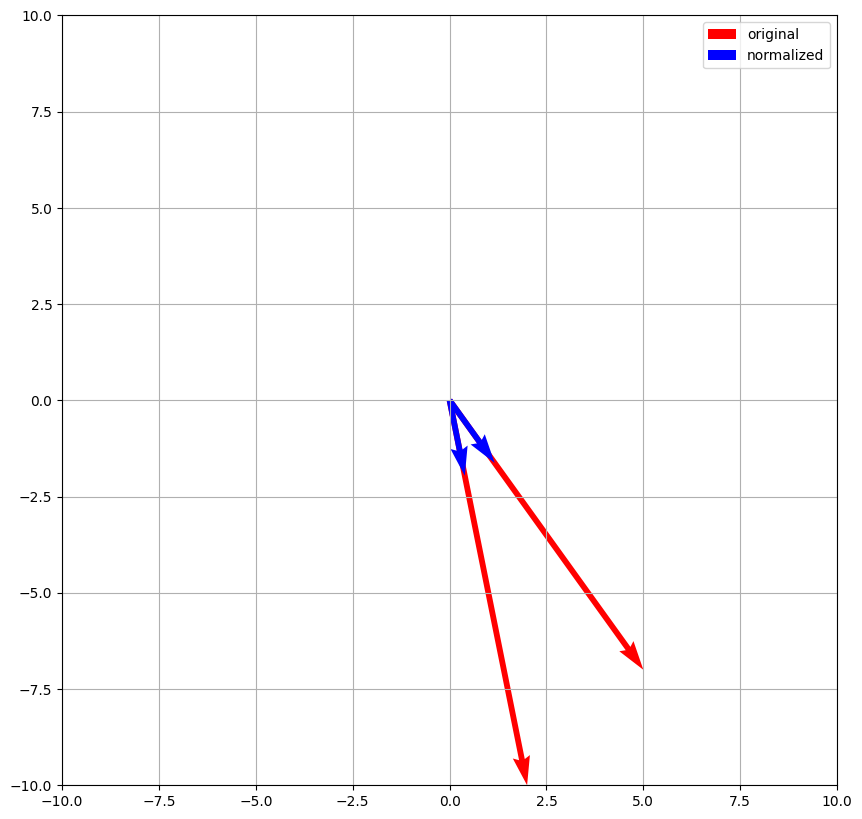

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = np.array(inputs[0]['X'])
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = np.array(answers['directions'][0]) * 2
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
#plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()


# Task 4. Scalar Product

Write a function that calculates
- cosine distance between the vectors
- use $10^{-8}$ additional constant in the denominator for the sake of numerical stability

In [12]:
def get_cosine(X):
    res = []
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            dot_product = np.dot(X[i], X[j])
            magnitude_Xi = np.sqrt(np.dot(X[i], X[i]))
            magnitude_Xj = np.sqrt(np.dot(X[j], X[j]))
            cosine_similarity = dot_product / ((magnitude_Xi * magnitude_Xj) + 1e-8)
            cosine_distance = 1 - cosine_similarity
            res.append(cosine_distance)
    return res

In [13]:
print(inputs)

[OrderedDict([('X', array([[  2,   5],
       [-10,  -7]]))]), OrderedDict([('X', array([[-7, -3],
       [-1,  9],
       [ 8, -6],
       [-4,  2],
       [-9, -4]]))]), OrderedDict([('X', array([[  4,   7],
       [ -5,   3],
       [ -2,  -1],
       [  9,   6],
       [  9,  -5],
       [  5,   5],
       [-10,   8],
       [ -7,   7],
       [  9,   9]]))]), OrderedDict([('X', array([[  4,  -3],
       [-10,  -9],
       [ -1, -10],
       [  0,  -7],
       [  1,   8]]))]), OrderedDict([('X', array([[ -8, -10],
       [-10,  -6],
       [ -5,  -4],
       [ -2,   7],
       [  5,  -6],
       [ -1,   0],
       [ -9,  -9],
       [ -3,  -1],
       [ -7,  -4]]))]), OrderedDict([('X', array([[  1,   4],
       [  8, -10],
       [  4,  -7],
       [  2,   0],
       [  1,  -6],
       [ -4,  -6],
       [  5,  -7],
       [  2,  -6],
       [ -2,   4]]))]), OrderedDict([('X', array([[ -7,   5],
       [  3,   6],
       [  7,  -5],
       [ -1,  -7],
       [-10,  -5],
       [-1

In [14]:
answers['cosine'] = [
    get_cosine(**inp) for inp in inputs
]

In [15]:
for inp in inputs:
    for key, value in inp.items():
        print(f"1. {key}: {value}")

1. X: [[  2   5]
 [-10  -7]]
1. X: [[-7 -3]
 [-1  9]
 [ 8 -6]
 [-4  2]
 [-9 -4]]
1. X: [[  4   7]
 [ -5   3]
 [ -2  -1]
 [  9   6]
 [  9  -5]
 [  5   5]
 [-10   8]
 [ -7   7]
 [  9   9]]
1. X: [[  4  -3]
 [-10  -9]
 [ -1 -10]
 [  0  -7]
 [  1   8]]
1. X: [[ -8 -10]
 [-10  -6]
 [ -5  -4]
 [ -2   7]
 [  5  -6]
 [ -1   0]
 [ -9  -9]
 [ -3  -1]
 [ -7  -4]]
1. X: [[  1   4]
 [  8 -10]
 [  4  -7]
 [  2   0]
 [  1  -6]
 [ -4  -6]
 [  5  -7]
 [  2  -6]
 [ -2   4]]
1. X: [[ -7   5]
 [  3   6]
 [  7  -5]
 [ -1  -7]
 [-10  -5]
 [-10   7]
 [  8  -6]
 [ -8   6]
 [ -7  -8]]
1. X: [[  3   6]
 [ -3  -1]
 [-10   0]
 [  8   1]]
1. X: [[-8 -8]
 [-7 -7]
 [ 8  4]
 [-7  7]]
1. X: [[ 4 -1]
 [-9 -6]
 [ 0  1]
 [-2  1]]
1. X: [[  9   6]
 [-10 -10]
 [ -4   9]
 [  4   0]]
1. X: [[-2  3]
 [-8 -7]
 [-8  1]
 [ 3  6]
 [-2 -2]]
1. X: [[ -2  -8]
 [ -7   2]
 [  4 -10]
 [ -6  -7]
 [  3   1]]
1. X: [[  3   3]
 [  1   6]
 [  4   6]
 [  9  -9]
 [ -2 -10]
 [ -6  -4]]
1. X: [[ 3 -3]
 [ 5 -1]
 [ 8 -2]
 [ 5  1]
 [-4  5]
 [-9  2

# Task 5. Orthonormalization

Create a pair of orthonormal vectors
- Take the first vector and normalize it
- Take the second vector, remove the collinear component to the first one
- Normalize it

In [16]:
def get_orthonormal(X):
    res = X.copy().astype('float32')
    n, m = res.shape

    for i in range(n):
        for j in range(i):
            projection = np.dot(res[j], res[i]) / (np.dot(res[j], res[j]) + 1e-8) * res[j]
            res[i] -= projection
        norm = np.sqrt(np.dot(res[i], res[i])) + 1e-8 
        res[i] /= norm

    return res

In [17]:
answers['orthonormal'] = [
    get_orthonormal(**inp) for inp in inputs
]

# 6. Visualization

[[  2   5]
 [-10  -7]]
[[ 0.74278134  1.8569534 ]
 [-1.8569534   0.7427813 ]]


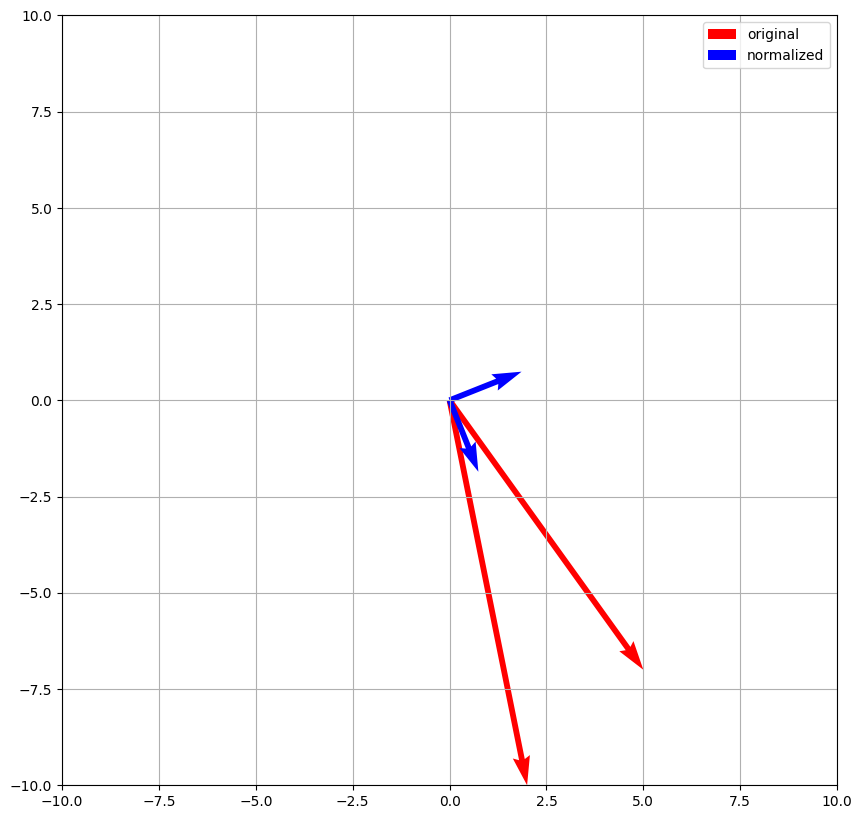

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
print(X)
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['orthonormal'][0] * 2
print(X)
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()


# 7. Saving the answer

In [19]:
json_tricks.dump(answers, '.answer.json')

'{"lengths": [{"__ndarray__": [10.198039027185569, 8.602325267042627], "dtype": "float64", "shape": [2]}, {"__ndarray__": [14.52583904633395, 12.083045973594572], "dtype": "float64", "shape": [2]}, {"__ndarray__": [21.494185260204677, 18.411952639521967], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.862780491200215, 17.406895185529212], "dtype": "float64", "shape": [2]}, {"__ndarray__": [18.920887928424502, 18.303005217723125], "dtype": "float64", "shape": [2]}, {"__ndarray__": [11.61895003862225, 18.384776310850235], "dtype": "float64", "shape": [2]}, {"__ndarray__": [22.02271554554524, 18.57417562100671], "dtype": "float64", "shape": [2]}, {"__ndarray__": [13.490737563232042, 6.164414002968976], "dtype": "float64", "shape": [2]}, {"__ndarray__": [15.033296378372908, 13.341664064126334], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.04987562112089, 6.244997998398398], "dtype": "float64", "shape": [2]}, {"__ndarray__": [14.594519519326424, 14.730919862656235], "dtype